# Demo - Gender Bias in Words Embedding
Based on:
Bolukbasi Tolga, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam T. Kalai. [Man is to computer programmer as woman is to homemaker? debiasing word embeddings](https://arxiv.org/abs/1607.06520). NIPS 2016.

## Imports

In [1]:
import matplotlib.pylab as plt

from gensim import downloader
from gensim.models import KeyedVectors

from ethically.we import GenderBiasWE

## Google's Word2Vec

### Download and load word2vec full model (it might take few minutes)

In [2]:
w2v_path = downloader.load('word2vec-google-news-300', return_path=True)
print(w2v_path)
w2v_model = KeyedVectors.load_word2vec_format(w2v_path, binary=True)

/home/users/user/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


### Create gender bias words embedding object

In [3]:
w2v_gender_bias_we = GenderBiasWE(w2v_model, only_lower=False, verbose=True)

Identify direction using pca method...
  Principal Component    Explained Variance Ratio
---------------------  --------------------------
                    1                  0.605292
                    2                  0.127255
                    3                  0.099281
                    4                  0.0483466
                    5                  0.0406355
                    6                  0.0252729
                    7                  0.0232224
                    8                  0.0123879
                    9                  0.00996098
                   10                  0.00834613


### Evaluate the Words Embedding

In [4]:
w2v_biased_evaluation = w2v_gender_bias_we.evaluate_words_embedding()

#### Word pairs

In [5]:
w2v_biased_evaluation[0]

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue,ratio_unkonwn_words
MEN,0.682,0.00,0.699,0.00,0.000
Mturk,0.632,0.00,0.656,0.00,0.000
RG65,0.801,0.03,0.685,0.09,0.000
RW,0.523,0.00,0.553,0.00,33.727
SimLex999,0.447,0.00,0.436,0.00,0.100
TR9856,0.661,0.00,0.662,0.00,85.430
WS353,0.624,0.00,0.659,0.00,0.000


#### Analogies

In [6]:
w2v_biased_evaluation[1]

,score
Google,0.740
MSR-syntax,0.736


### Calculate direct gender bias

In [7]:
w2v_gender_bias_we.calc_direct_bias()

0.0730790424948194

### Plot the projection of the most extreme professions on the gender direction

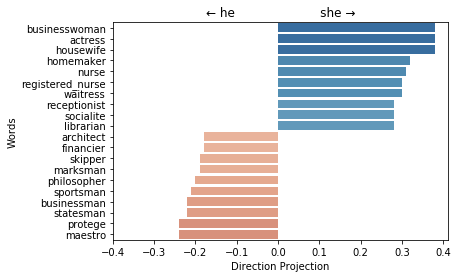

In [8]:
w2v_gender_bias_we.plot_projection_scores()

### Plot the distribution of projections of the word groups that are being used for the auditing and adjusting the model

1. **profession_name** - List of profession names, neutral and gender spcific.
2. **neutral_profession_name** - List of only neutral profession names.
3. **specific_seed** - Seed list of gender specific words.
4. **specific_full** - List of the learned specifc gender over all the vocabulary.
5. **specific_full_with_definitional** -  **specific_full** with the words that were used to define the gender direction.
6. **neutral_words** - List of all the words in the vocabulary that are not part of **specific_full_with_definitional**.

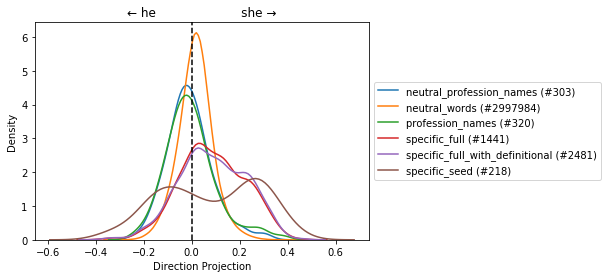

In [9]:
w2v_gender_bias_we.plot_dist_projections_on_direction()

### Generate analogies along the gender direction
Skipping the first 50, because they are mostly appropriate gender analogies

In [10]:
w2v_gender_bias_we.generate_analogies(150)[50:]

,x,y,distance,score
50,diva,superstar,0.912041,0.478637
51,Kylie,Robbie,0.965910,0.469355
52,Ana,Sergio,0.932191,0.459715
53,Lady_Vols,Vols,0.667961,0.455486
54,Gloria,Ernie,0.987297,0.455313
55,Susie,Johnny,0.982425,0.451297
56,Veronica,Dominic,0.991988,0.450322
57,Mother_Day,Father_Day,0.696741,0.450317
58,waitress,waiter,0.695489,0.449741
59,LPGA_Tour,PGA_Tour,0.654526,0.445583


### Generate the Indirect Gender Bias in the direction `softball`-`football`

In [11]:
w2v_gender_bias_we.generate_closest_words_indirect_bias('softball', 'football')

projection  indirect_bias
end      word                                       
softball bookkeeper          0.195044       0.201158
         registered_nurse    0.176933       0.287150
         infielder           0.171764      -0.054049
         waitress            0.163246       0.317842
         receptionist        0.159252       0.672343
football philosopher        -0.148482       0.220857
         pundit             -0.170339       0.101227
         businessman        -0.174114       0.170078
         maestro            -0.175094       0.415804
         footballer         -0.275374       0.015366

### Preform hard-debiasing

The table shows the details of the equalize step on the equality sets.

In [12]:
w2v_gender_debias_we = w2v_gender_bias_we.debias('hard', inplace=False)

Neutralize...


100%|██████████| 2997984/2997984 [03:28<00:00, 14359.90it/s]


Equalize...
Equalize Words Data (all equal for 1-dim bais space (direction):
                    equalized_projected_scalar    projected_scalar    scaling
----------------  ----------------------------  ------------------  ---------
(0, 'she')                            0.443113           0.469059    0.443113
(0, 'he')                            -0.443113          -0.362353    0.443113
(1, 'Her')                            0.272142           0.267272    0.272142
(1, 'His')                           -0.272142          -0.122555    0.272142
(2, 'SHE')                            0.540225           0.385345    0.540225
(2, 'HE')                            -0.540225          -0.120598    0.540225
(3, 'Daughter')                       0.469635           0.22278     0.469635
(3, 'Son')                           -0.469635          -0.16829     0.469635
(4, 'her')                            0.430368           0.446157    0.430368
(4, 'his')                           -0.430368          -0.333555

## Now our model is gender debiased, let's check what changed...

### Evaluate the debaised model


The evaluation of the words embedding did not change so much because of the debiasing:

In [13]:
w2v_debiased_evaluation = w2v_gender_debias_we.evaluate_words_embedding()

In [14]:
w2v_debiased_evaluation[0]

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue,ratio_unkonwn_words
MEN,0.680,0.000,0.698,0.00,0.000
Mturk,0.633,0.000,0.656,0.00,0.000
RG65,0.800,0.031,0.685,0.09,0.000
RW,0.522,0.000,0.552,0.00,33.727
SimLex999,0.450,0.000,0.438,0.00,0.100
TR9856,0.661,0.000,0.662,0.00,85.430
WS353,0.623,0.000,0.657,0.00,0.000


In [15]:
w2v_debiased_evaluation[1]

,score
Google,0.737
MSR-syntax,0.736


### Calculate direct gender bias

In [16]:
w2v_gender_debias_we.calc_direct_bias()

1.7964246601064155e-09

The words embedding is not biased any more (in the professions sense).

### Plot the projection of the most extreme professions on the gender direction
Note that (almost) all of the non-zero projection words are gender specific.

The word *teenager* have a projection on the gender direction because it was learned mistakenly as a gender-specific word by the linear SVM, and thus it was not neutralized in the debias processes.

The words provost, serviceman and librarian have zero projection on the gender direction.

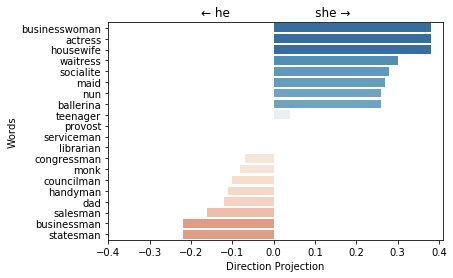

In [17]:
w2v_gender_debias_we.plot_projection_scores()

### Generate analogies along the gender direction

In [18]:
w2v_gender_debias_we.generate_analogies(150)[50:]

,x,y,distance,score
50,estrogen,hormone,0.696338,3.415194e-01
51,brides,couples,0.972528,3.321108e-01
52,breasts,penis,0.831993,3.135472e-01
53,compatriots,countrymen,0.668135,2.980544e-01
54,Moms,Kids,0.956169,2.873899e-01
55,Mothers,Families,0.992906,2.803815e-01
56,maid,prostitute,0.996605,2.730137e-01
57,entrepreneur,businessman,0.812313,2.690392e-01
58,menopause,osteoporosis,0.916623,2.671666e-01
59,maternal,reproductive,0.995438,2.265359e-01


### Generate the Indirect Gender Bias in the direction `softball`-`football`

In [19]:
w2v_gender_debias_we.generate_closest_words_indirect_bias('softball', 'football')

projection  indirect_bias
end      word                                      
softball infielder          0.149894   1.008288e-07
         major_leaguer      0.113700   5.297945e-09
         bookkeeper         0.104209   3.627948e-08
         patrolman          0.092638   1.222811e-07
         investigator       0.081746  -1.263093e-09
football midfielder        -0.153175   2.186535e-08
         lecturer          -0.153629   1.659876e-08
         vice_chancellor   -0.159645   1.804495e-07
         cleric            -0.166934  -3.282093e-08
         footballer        -0.325018   4.989304e-08

## Facebook's FastText words embedding

In [20]:
fasttext_path = downloader.load('fasttext-wiki-news-subwords-300', return_path=True)
print(fasttext_path)
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path)

fasttext_gender_bias_we = GenderBiasWE(fasttext_model, only_lower=False, verbose=True)

/home/users/user/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
Identify direction using pca method...
  Principal Component    Explained Variance Ratio
---------------------  --------------------------
                    1                   0.531331
                    2                   0.18376
                    3                   0.089777
                    4                   0.0517856
                    5                   0.0407739
                    6                   0.0328988
                    7                   0.0223339
                    8                   0.0193495
                    9                   0.0143259
                   10                   0.0136648


## We can compare the projections of neutral profession names on the gender direction for the two original words embeddings

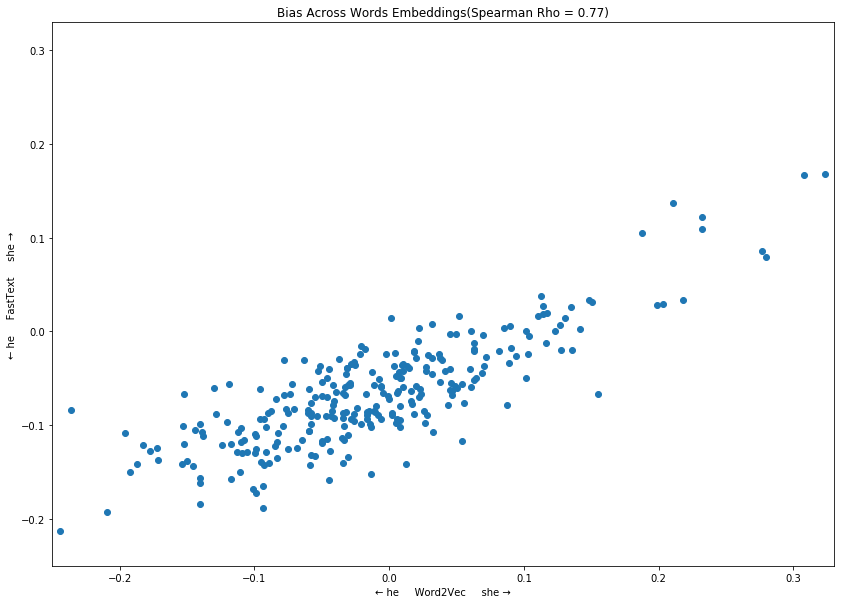

In [21]:
f, ax = plt.subplots(1, figsize=(14, 10))
GenderBiasWE.plot_bias_across_words_embeddings({'Word2Vec': w2v_gender_bias_we,
                                                'FastText': fasttext_gender_bias_we},
                                               ax=ax)

### And now let's preform the same steps for FastText

In [22]:
fasttext_biased_evaluation = fasttext_gender_bias_we.evaluate_words_embedding()

In [23]:
fasttext_biased_evaluation[0]

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue,ratio_unkonwn_words
MEN,0.669,0.000,0.673,0.000,0.000
Mturk,0.676,0.000,0.682,0.000,0.000
RG65,0.766,0.044,0.667,0.102,0.000
RW,0.546,0.000,0.546,0.000,16.519
SimLex999,0.432,0.000,0.418,0.000,0.100
TR9856,0.648,0.000,0.626,0.000,85.217
WS353,0.606,0.000,0.596,0.000,0.000


In [24]:
fasttext_biased_evaluation[1]

,score
Google,0.883
MSR-syntax,0.917


In [25]:
fasttext_gender_bias_we.calc_direct_bias()

0.07633256240142092

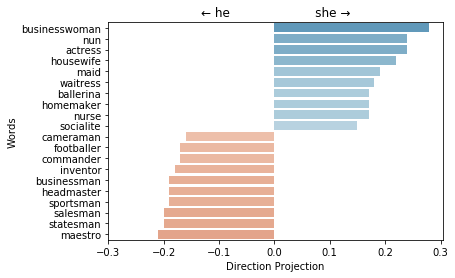

In [26]:
fasttext_gender_bias_we.plot_projection_scores();

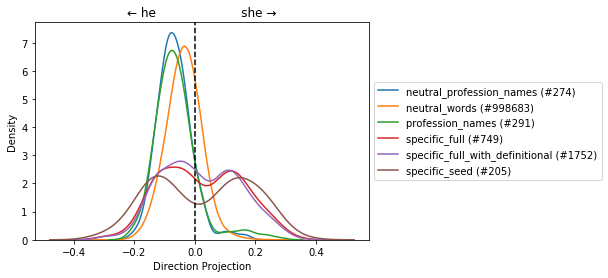

In [27]:
fasttext_gender_bias_we.plot_dist_projections_on_direction();

In [28]:
w2v_gender_bias_we.generate_analogies(150)[100:]

,x,y,distance,score
100,female,male,0.564742,0.352283
101,singer,frontman,0.893373,0.346936
102,Volleyball,Football,0.938328,0.344304
103,feminist,liberal,0.997903,0.341058
104,kids,guys,0.946709,0.340327
105,estrogen,testosterone,0.796327,0.335635
106,adorable,goofy,0.952828,0.331766
107,feisty,combative,0.935207,0.326646
108,skirts,shorts,0.953106,0.326539
109,dresses,shirts,0.996928,0.325354


In [29]:
w2v_gender_bias_we.generate_closest_words_indirect_bias('softball', 'football')

projection  indirect_bias
end      word                                       
softball bookkeeper          0.195044       0.201158
         registered_nurse    0.176933       0.287150
         infielder           0.171764      -0.054049
         waitress            0.163246       0.317842
         receptionist        0.159252       0.672343
football philosopher        -0.148482       0.220857
         pundit             -0.170339       0.101227
         businessman        -0.174114       0.170078
         maestro            -0.175094       0.415804
         footballer         -0.275374       0.015366

In [30]:
fasttext_gender_bias_we.debias('hard')

Neutralize...


100%|██████████| 998683/998683 [01:11<00:00, 13918.45it/s]


Equalize...
Equalize Words Data (all equal for 1-dim bais space (direction):
                    equalized_projected_scalar    projected_scalar    scaling
----------------  ----------------------------  ------------------  ---------
(0, 'she')                            0.327879          0.272553     0.327879
(0, 'he')                            -0.327879         -0.314674     0.327879
(1, 'Her')                            0.348146          0.308703     0.348146
(1, 'His')                           -0.348146         -0.247824     0.348146
(2, 'SHE')                            0.457835          0.293494     0.457835
(2, 'HE')                            -0.457835         -0.130146     0.457835
(3, 'Daughter')                       0.387263          0.12953      0.387263
(3, 'Son')                           -0.387263         -0.164091     0.387263
(4, 'her')                            0.367055          0.329466     0.367055
(4, 'his')                           -0.367055         -0.301367 

In [31]:
fasttext_debiased_evaluation = fasttext_gender_bias_we.evaluate_words_embedding()

In [32]:
fasttext_debiased_evaluation[0]

,pearson_r,pearson_pvalue,spearman_r,spearman_pvalue,ratio_unkonwn_words
MEN,0.669,0.000,0.673,0.000,0.000
Mturk,0.677,0.000,0.682,0.000,0.000
RG65,0.767,0.044,0.667,0.102,0.000
RW,0.545,0.000,0.546,0.000,16.519
SimLex999,0.433,0.000,0.419,0.000,0.100
TR9856,0.647,0.000,0.625,0.000,85.217
WS353,0.609,0.000,0.598,0.000,0.000


In [33]:
fasttext_debiased_evaluation[1]

,score
Google,0.882
MSR-syntax,0.916


In [34]:
fasttext_gender_bias_we.calc_direct_bias()

1.4306556948502593e-09

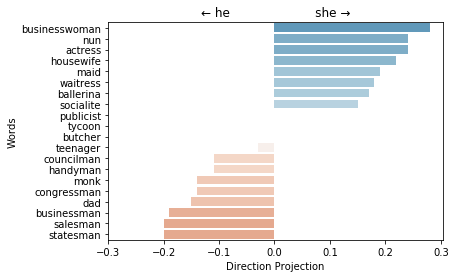

In [35]:
fasttext_gender_bias_we.plot_projection_scores();

In [36]:
fasttext_gender_bias_we.generate_analogies(150)[100:]

,x,y,distance,score
100,3-4,3-5,0.451103,1.995020e-08
101,77,71,0.367198,1.971283e-08
102,23rd,24th,0.231645,1.946727e-08
103,Feb,Oct,0.261598,1.938152e-08
104,biotech,biotechnology,0.534111,1.923940e-08
105,October,November,0.172787,1.919794e-08
106,Tuesday,Thursday,0.217532,1.911626e-08
107,non-profit,nonprofit,0.416925,1.909318e-08
108,3.4,4.6,0.427952,1.906302e-08
109,1814,1811,0.420682,1.865536e-08


In [37]:
fasttext_gender_bias_we.generate_closest_words_indirect_bias('softball', 'football')

projection  indirect_bias
end      word                                 
softball infielder     0.186223   4.205870e-08
         alderman      0.100549   7.837655e-08
         handyman      0.066572  -6.646021e-03
         mediator      0.060695   1.667881e-07
         ranger        0.059893   1.444559e-07
football coach        -0.185766   5.122636e-08
         sportsman    -0.204266   1.253264e-07
         goalkeeper   -0.234506   7.194591e-08
         midfielder   -0.236263   1.018931e-08
         footballer   -0.385277   1.098612e-07